# 고양이 수염 스티커 만들기

## 이미지 가져오기
웹에서 공개용으로 사용할 수 있는 임의의 정면사진 이미지를 가져왔다.

In [1]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 
import copy

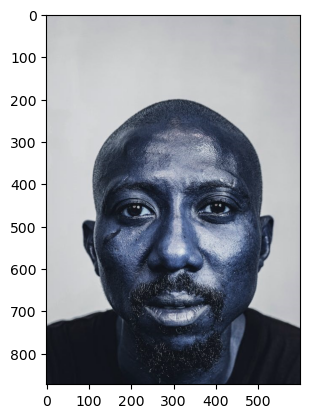

In [2]:
img_path='C:\\Users\\wader\\workplace\\ess_data\\[E-07]Image_Recognition\\sample_image.png'
img_bgr= cv2.imread(img_path)

plt.imshow(img_bgr)
plt.show()

역시 예상했던 것처럼 보지도 않고 볼 생각도 없는 아바타2의 나비족 형님이 등장하셨다.  
이는 cv2.imread()가 색상 정보 인식을 BGR순으로 하고 있기 때문에 R을 B로, B를 R로 읽어들였기 때문이다.  
이를 수정하여 RGB 형태로 출력하도록 바꿔보았다.

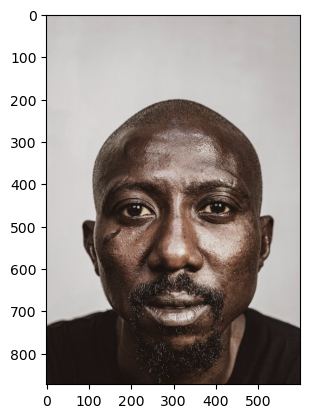

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

원본 사진의 색상으로 복원하였다. 노드의 사진도 그렇고, 흔히 '살색'이라고 부르는 색상에는  
붉은색이 많이 조합될 수 밖에 없는 것인지 생각만 하고 넘어가기로 하였다.  

## 얼굴 검출
고양이 콧수염을 얼굴 위에 붙이기 위해서는 먼저 얼굴의 형태를 확인하고 추출한 뒤, 추출한 골격을 기반으로 고양이 수염의 위치를 정할 수 있다. 얼굴 검출을 위해 dlib를 사용하기로 하였다. dlib의 face dectecor는 HOG과 SVM을 이용하여 얼굴을 검출한다.

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb, 1) # 1은 이미지 피라미드의 수이며, 적정한 수를 알기 어려워 노드값 1을 그대로 사용

In [5]:
# 얼굴박스(사각)의 좌표를 출력한다.
print(dlib_rects)

rectangles[[(118, 376) (504, 761)]]


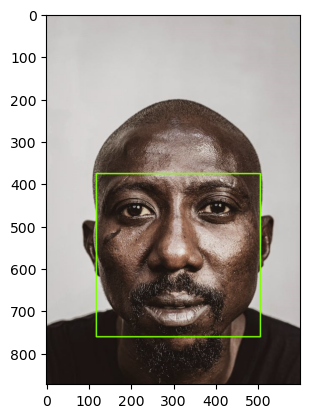

In [6]:
# rgb원본은 보관하고, 다른 변수를 사용한다.
# img_rgb_rects=img_rgb.copy()
img_rgb_rects=copy.deepcopy(img_rgb)
# 추출한 사각 좌표들을 사용하여 img_rgb에 반영
# 여기서 주의할 점은 이미지의 좌표에서 원점 0은 좌상단에서 시작한다는 점이며
# 아래로 내려갈수록 y축의 값은 증가한다. 즉, 아래로 내려가도 -가 아니라 +로 나타낸다.
# detector_hog()는 모든 검출된 얼굴에 대해 출력하기 때문에 여러 검출값이 들어있을 수 있다.
# 다만 1개 값만 검출되는 것을 확인하였기 때문에 [0]을 붙여 좌표평면 값에 접근한다.
l= dlib_rects[0].left()
t= dlib_rects[0].top()
r= dlib_rects[0].right()
b= dlib_rects[0].bottom()

# 각 매개변수는 사각형을 그릴 이미지, 좌표, 색상, 선 굵기(2), 선 종류를 나타낸다.(cv2.LINE_AA)
cv2.rectangle(img_rgb_rects, (l,t), (r,b), (128, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb_rects)
plt.show()


## 랜드마크 설정
검출된 얼굴의 이목구비의 위치를 정확하게 확인하기 위해서는 얼굴 랜드마크가 필요하다.  
Dlib에서 제공하는 모델을 참고하여 검출을 시도하였다.

In [7]:
model_path='C:\\Users\\wader\\workplace\\ess_data\\[E-07]Image_Recognition\\shape_predictor_68_face_landmarks.dat'

# landmark_predictor를 생성한다.
landmark_predictor= dlib.shape_predictor(model_path)

In [8]:
# img_rgb_rects에서 landmark를 생성하고, landmark 위치정보를 point에 저장
points= landmark_predictor(img_rgb_rects, dlib_rects[0])

# point의 위치정보를 (x,y) 형태로 변환하여 List_landmarks 에 저장
landmark= list(map(lambda p: (p.x, p.y), points.parts()))

print(len(landmark))

68


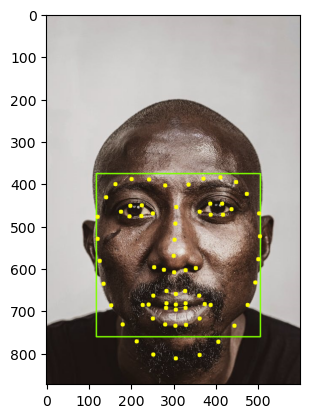

In [9]:
for point in landmark:
    cv2.circle(img_rgb_rects, point, 5, (255,255, 0), -1)
    
plt.imshow(img_rgb_rects)
plt.show()

## 고양이 수염 입히기
추출한 landmark를 기반으로 코의 위치를 찾은 다음, 고양이 수염 이미지를 덮어씌우기로 하였다.  
landmark에서 코 위치는 30에 해당하므로, 코의 와표를 확인해 보았다.

In [10]:
print(landmark[30])
x= landmark[30][0]
y= landmark[30][1]
# w=h=dlib_rects[0].width()
print (f'(x,y) : ({x},{y})')
# print (f'(w,h) : ({w},{h})')

(300, 570)
(x,y) : (300,570)


우선, 사진과 고양이 수염 이미지를 대조해 보기 위해 사진 이미지와 수염 이미지의 shape을 알아보고 수염 이미지를 띄워보기로 하였다

사진 이미지 크기: (873, 600, 3)
고양이수염 이미지 크기: (512, 512, 3)


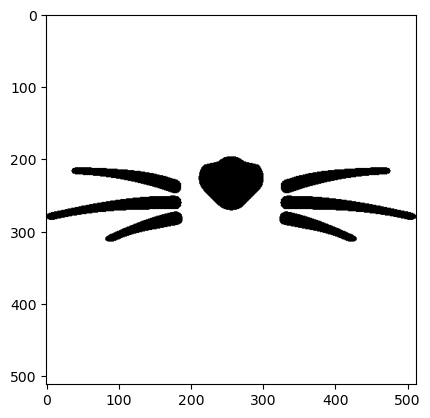

In [11]:
catw_path='C:\\Users\\wader\\workplace\\ess_data\\[E-07]Image_Recognition\\cat_whiskers.png'
img_catw=cv2.imread(catw_path)

#크기 확인: (y, x)형태로 표시된다.
print('사진 이미지 크기:', img_rgb.shape)
print('고양이수염 이미지 크기:', img_catw.shape)
plt.imshow(img_catw)
plt.show()

가로, 세로 크기 모두 수염 이미지가 사진 이미지보다 작은 편이며 눈대중이긴 하지만 수염의 원본 크기를 조정하거나 하지 않아도 충분히 괜찮은 그림이 나올 것 같다.
고로, 스티커를 붙일 좌표를 계산해 보았다. 고양이수염 이미지의 중심이 되는 코는 (256, 256)에 위치한다고 봐도 될 것으로 보였기 때문에 해당 위치에 점을 찍어 보았다.

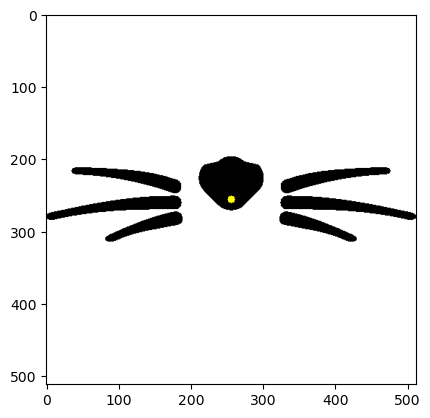

In [12]:
img_catw_sample=img_catw.copy()
cv2.circle(img_catw_sample, (256, 256), 5, (255,255, 0), -1)
plt.imshow(img_catw_sample)
plt.show()

예상했던 것처럼 수염 이미지의 정 중앙에 코가 있는 것을 확인하였고, 얼굴 이미지의 코와 같은 위치에 붙이기만 하면 될 것으로 보인다. 이미지 좌표는 좌상단을 원점으로 하기 때문에, 얼굴 이미지의 코를 기준으로 yx축이 각각 256만큼 줄어든 점에서 이미지가 나오도록 만들어야 한다. 얼굴 이미지의 코 좌표가 (300, 570)이므로 (44, 314)에서 이미지가 표시되도록 설정하였다.

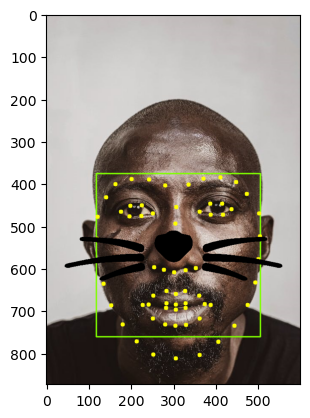

In [13]:
# 스티커 영역을 설정한다.
sticker_area= img_rgb_rects[314:314+img_catw.shape[0], 44:44+img_catw.shape[1]]
# 값이 0이 아니라면(흰 공간이 아니라면) sticker_area에 img_catw 값을 할당
img_rgb_rects[314:314+img_catw.shape[0], 44:44+img_catw.shape[1]]= np.where(img_catw!=0, sticker_area, img_catw).astype(np.uint8)

plt.imshow(img_rgb_rects)
plt.show()

제대로 결과가 나온 것을 확인하였고, 이를 원본 사진에 적용해 보았다.

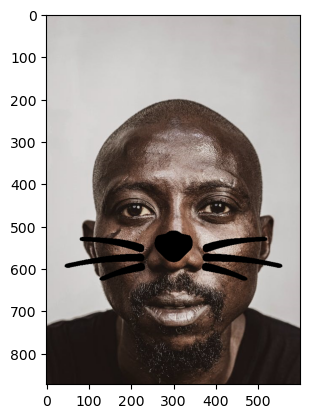

In [16]:
sticker_area= img_rgb[314:314+img_catw.shape[0], 44:44+img_catw.shape[1]]
img_rgb[314:314+img_catw.shape[0], 44:44+img_catw.shape[1]]= np.where(img_catw!=0, sticker_area, img_catw).astype(np.uint8)

plt.imshow(img_rgb)
plt.show()

회고

이번 카메라 이미지 과제는 다른 과제들보다 난이도도 낮고 배울 것들이 비교적 적은 과제였다고 생각한다. CV관련 주제이기는 했지만 실질적으로 이미지 편집 위주의 주제에 속하다 보니 결과물을 보는 재미도 있고... 엄청난 무언가를 얻어가는 과제는 아니었지만 나름 즐길 수 있는 과제였던 것 같다.    
  
평이한 과제에서 한 가지 인상깊었던 점은 np.where()의 사용이었다. np.where()은 numpy 데이터를 다루는데 특화되어있는 함수라 할 수 있는데, 이 함수를 이미지 편집에 사용할 것이라고는 상상하지 못했다. 이미지 파일도 데이터의 나열이고 where을 사용하지 못할 이유는 없음에도 일반 정형 데이터들과 다른 방식으로 표현되다 보니 이미지 데이터를 다룸에 있어 특별한 무언가가 필요하다고 생각했던 내게는 신선한 활용이었다.  